

























































# Zadanie 1

Wczytaj dane z pliku dab.csv oraz wyznacz równanie regresji obajśniającej wiek drzewa. Znajdź współczynniki regresji rozwiązując równanie normalne  $X^TX=X^Ty$ (np. funkcją solve z numpy.linalg) . Wcześniej odpowiednio przygotuj dane do pracy. Wyniki zilustruj odpowiednim rysunkiem.



In [20]:
import numpy as np
import pandas as pd

data = pd.read_csv("dab.csv", delimiter=',')
#data.head()

In [21]:
data = data.dropna(axis = 0)

y = data['wiek'].values.astype(float)[np.newaxis].T

X = data['srednica'].values.astype(float)[np.newaxis].T

one = np.ones((12,1))
X = np.concatenate((one,X), axis=1)
X = X.astype(float)
#print(X)
#print(y)

In [22]:
A = np.dot(X.T,X)
B = np.dot(X.T,y)
#print(A)
#print(B)

beta = np.linalg.solve(A,B).flatten()
print(beta)

[12.72494172  0.88951049]


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

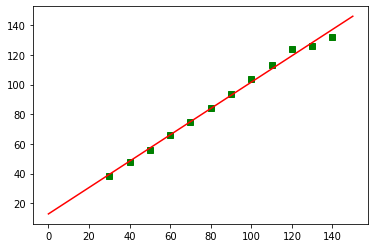

In [24]:
x_val = data['srednica'].values
y_val = data['wiek'].values
y_pred0 = beta[0]+beta[1]*x_val
plt.plot(x_val, y_val, 'gs')

X_val = np.linspace(0,150,100)
Y_val = beta[0] + beta[1]*X_val
plt.plot(X_val,Y_val, '-r')

plt.show()

Wiele modeli uczenia maszynowego można znaleźć w bibliotece $\verb+sklearn+ $.
W szczeolności regresję liniową można trenować przy użyciu funkcji $\texttt{LinearRegression()}$ z podbiblioteki $\verb+sklearn.linear_model+$.

In [25]:
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(X_train,y_train)
#y_pred = model.predict(X_test)

# Zadanie 2

Proszę wprowadzić sztuczne dane ($x_i,y_i$, dla $n=1000$) będące zaburzeniem losowym funkcji $x^2$ na odcinku $[-1,1]$ (czyli $y_i-x_i^2$ są próbą losową o średniej $0$). 
Następnie proszę podzielić zbiór danych na pół zgodnie z porządkiem ($x_i$; może być też względem $0$) oraz wytrenować regresję liniową (bez transformacjizmiennych) używając pierwszej części danych. 
Proszę podać współczynniki modelu.
Proszę obliczyć średni błąd ($\frac{\sum_{i=1}^{n/2}(\hat{y_i}-y_i)^2}{n/2}$) wartości dopasowanych dla danych treningowych (pierwszej części) oraz testowych (druga część).


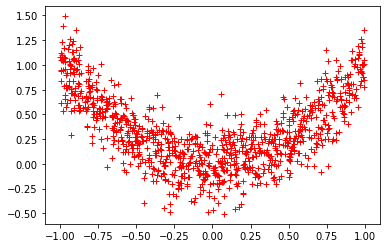

In [26]:
N = 1000

X = np.sort(2*np.random.rand(N)-1)
#print(X)

sigma = 0.2
y = sigma*np.random.randn(N)+X**2
#print(Y)

plt.plot(X,y, 'r+')
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

X_train1, y_train1 = X[:int(N/2)][np.newaxis].T, y[:int(N/2)][np.newaxis].T
X_test1, y_test1 = X[int(N/2):][np.newaxis].T, y[int(N/2):][np.newaxis].T

model = LinearRegression()
model.fit(X_train1,y_train1)

print(model.coef_)
print(model.intercept_)

[[-1.09498424]]
[-0.20757415]


In [28]:
y_pred1 = model.predict(X_test1)

err = np.dot((y_test1-y_pred1).T,(y_test1-y_pred1))/(N/2)
print(err)

[[1.45050928]]


Biblioteka $\texttt{sklearn}$ zapewnia również funkcję do automatycznego dzielenia zbioru dancyh train_test_split.
Natomiast funkcja $\texttt{r2_score}$ ($\texttt{sklearn.metrics}$) zapewnia możliwość obliczenia $R^2$. 

# Zadanie 3

Proszę użyć powyższej funkcji i przy jej pomocy dokonać podziału zbiorów danych z Zadania 2 oraz (powtórzyć resztę zadania).
Oblicz $R^2$ dla dopasowania modelu w tym zadaniu oraz w poprzednim.

[[-0.08445294]]
[0.32469119]
error:  [[0.13990035]]


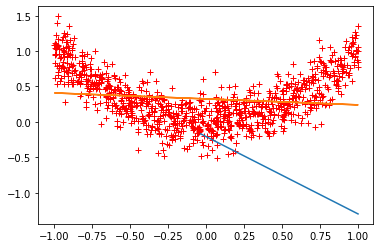

In [29]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X[np.newaxis].T,y[np.newaxis].T, test_size=0.5)

model2 = LinearRegression()
model2.fit(X_train2,y_train2)

print(model2.coef_)
print(model2.intercept_)

y_pred2 = model2.predict(X_test2)

err = np.dot((y_test2-y_pred2).T,(y_test2-y_pred2))/(N/2)
print("error: ",err)

plt.plot(X,y, 'r+')
plt.plot(X_test1, y_pred1)
plt.plot(X_test2, y_pred2)
plt.show()

In [30]:
from sklearn import metrics

print(metrics.r2_score(y_test1,y_pred1))
print(metrics.r2_score(y_test2,y_pred2))

-10.55173641613867
-0.006491917625067289


# Zadanie 4

In [31]:
Dla modeli z zadania 1 i 2 oblicz średni błąd kwadratowy (mean_squared_error) oraz średni błąd bezwzględny (mean_absolute_error).
Następnie narysuj histogram błędów.


SyntaxError: invalid syntax (<ipython-input-31-84712bfb5b83>, line 1)

In [32]:
print(metrics.mean_squared_error(y_val, y_pred0))
print(metrics.mean_absolute_error(y_val, y_pred0))

print(metrics.mean_squared_error(y_test1, y_pred1))
print(metrics.mean_absolute_error(y_test1, y_pred1))


5.84110334110333
1.77156177156177
1.4505092841087361
1.0232637081163374


In [33]:
# Zadanie 5



Do danych z zadania 2, dopasuj lepszy model (użyj transformacji zmiennych np. $\texttt{PolynomialFeatures}$, zrób to ponownie dzieląc zbiór danych na dwie części). 
Następnie wypisz współczynniki, oblicz $R^2$ oraz średni błąd kwadratowy na obydwy częściach.

In [34]:
X = X[np.newaxis].T

In [35]:
from sklearn.preprocessing import PolynomialFeatures

#print(X)
poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
#print(X2)


In [36]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y[np.newaxis].T, test_size=0.5)

model3 = LinearRegression()

model3.fit(X_train3,y_train3)
print(model3.coef_)

y_pred3 = model3.predict(X_test3)
print(metrics.r2_score(y_test3, y_pred3))
print(metrics.mean_squared_error(y_test3,y_pred3))

y_pred3b = model3.predict(X_train3)
print(metrics.r2_score(y_train3, y_pred3b))
print(metrics.mean_squared_error(y_train3,y_pred3b))

#print(y_pred3)

[[ 0.         -0.02136049  0.98891612]]
0.7292911028946661
0.03859089431192489
0.6645208577762651
0.042444378785297346


# Testowanie krzyżowe

In [37]:
from sklearn.model_selection import cross_val_score

# Zadanie 6

Wykonaj testowanie krzyżowe $\texttt{cross_val_score}$ dla modeli z zadania 2 oraz 5.

In [39]:
print(cross_val_score(model, X_train1, y_train1))
print(cross_val_score(model3, X_train3, y_train3))

[-0.49817597  0.16962177 -0.23580717  0.04477498 -1.42822014]
[0.67706771 0.62054517 0.66791034 0.70283281 0.60300159]
